(sec:pandas10min_1)=
# 판다스 10분 완성 1부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

**참고**

[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)의 내용을 정리하였다.

## 시리즈와 데이터프레임

### 시리즈 객체 생성

리스트를 이용하여 시리즈를 생성할 수 있다.

In [11]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 데이터프레임 객체 생성

**방식 1**

2차원 어레이, 인덱스 라벨, 열 라벨을 지정하여 데이터프레임을 생성한다.

- 인덱스 라벨 지정

`pd.date_range()` 함수는 시간으로 구성된 인덱스 자료형을 생성한다.
함수 호출에 사용된 키워드 인자의 의미는 다음과 같다.

- `start="20130101`: 2013년 1월 1일부터 시작
- `periods=6`: 첫째 인자로 지정된 시간부터 6 개의 시간 데이터 샘플 생성
- `freq="S"`: 시간 데이터 샘플을 일(day) 단위로 생성

In [162]:
dates = pd.date_range(start="20130101", periods=6, freq="D")
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨 지정

아래 코드는 알파벳 A, B, C, D를 이용하여 열 라베을 지정한다.

In [13]:
np.random.seed(0)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


**방식 2**

사전 객체를 이용한다.

- 열 라벨: 사전의 키 사용
- 인덱스 라벨: 위치 인덱스는 정수 인덱스로 자동 지정됨.

In [15]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": ["test", "train", "test", "train"],
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임은 열별로 다른 자료형이 허용된다.

In [16]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E           object
F           object
dtype: object

## 데이터 살펴보기

**데이터 일부 확인**

- 처음 5행 확인

In [17]:
df.head()

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096


- 끝에서 5행 확인

In [19]:
df.tail()

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


확인하고자 하는 행의 수를 지정할 수도 있다.

In [21]:
df.head(3)

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274


In [22]:
df.tail(3)

,A,B,C,D
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


**라벨 확인**

- 인덱스 라벨 확인

In [23]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨 확인

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

**넘파이 어레이로 변환**

인덱스 라벨과 열 라벨 정보가 삭제된다.

In [26]:
df.to_numpy()

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]])

열별 자료형이 통일되지 않은 경우: `object`로 통일된 자료형이 `dtype`으로 지정된다.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

**수치형 데이터의 분포 확인**

In [27]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.538420,0.067269,0.615706,0.380204
std,1.685238,0.590042,0.360293,1.239655
min,-2.552990,-0.977278,0.144044,-0.854096
25%,0.112845,-0.123450,0.345767,-0.594463
50%,1.127558,0.260916,0.654150,0.091159
75%,1.696559,0.407988,0.928675,1.174124
max,1.867558,0.653619,0.978738,2.240893


## 정렬

- 열 라벨 내림차순 정렬

In [32]:
df.sort_index(axis=1)

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


In [33]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2.240893,0.978738,0.400157,1.764052
2013-01-02,-0.151357,0.950088,-0.977278,1.867558
2013-01-03,1.454274,0.144044,0.410599,-0.103219
2013-01-04,0.333674,0.443863,0.121675,0.761038
2013-01-05,-0.854096,0.313068,-0.205158,1.494079
2013-01-06,-0.742165,0.864436,0.653619,-2.552990


- 특정 열의 값을 기준으로 행 정렬

In [34]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


## 인덱싱/슬라이싱

**열 라벨 인덱싱**

시리즈가 생성된다.

In [35]:
df["A"]

2013-01-01    1.764052
2013-01-02    1.867558
2013-01-03   -0.103219
2013-01-04    0.761038
2013-01-05    1.494079
2013-01-06   -2.552990
Freq: D, Name: A, dtype: float64

열 라벨을 객체의 속성처럼 이용하는 방식도 가능하다. 
단, 열 라벨의 이름이 공백을 포함하지 않아야 한다.

In [18]:
df.A

2013-01-01    1.764052
2013-01-02    1.867558
2013-01-03   -0.103219
2013-01-04    0.761038
2013-01-05    1.494079
2013-01-06   -2.552990
Freq: D, Name: A, dtype: float64

**행 슬라이싱**

위치 인덱스를 활용하여 행 슬라이싱을 진행하면 데이터프레임이 생성된다.

In [36]:
df[0:3]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274


인덱스 라벨을 활용하여 슬라이싱을 진행할 수도 있다. 
위치 인덱스 방식과는 달리 구간의 마지막 라벨로 포함된다.

In [20]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274


:::{admonition} 라벨 슬라이싱의 구간
:class: note

라벨을 이용한 슬라이싱은 구간의 양끝을 모두 포함한다.
:::

**`loc[]` 객체 활용: 라벨 인덱싱/슬라이싱**

인덱싱 또는 슬라이이싱을 이용하여 데이터프레임의 행과 열의 일부를 다른 값으로 대체하려면
`loc[]` 객체 또는 `iloc[]` 개체를 이용한다.

- `loc[]` 객체: 행 라벨과 열 라벨 활용
- `iloc[]` 객체: 행과 열의 정수 인덱스 활용

`df`의 인덱스는 `dates` 변수가 가리키는 날짜 인덱스를 사용한다.

In [38]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [39]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

첫째 날짜의 데이터는 다음과 같다.

In [40]:
df.loc[dates[0]]

A    1.764052
B    0.400157
C    0.978738
D    2.240893
Name: 2013-01-01 00:00:00, dtype: float64

**축 활용**

행과 열에 대한 인덱싱/슬라이싱 동시에 지정하려면 축을 활용한다.

- `A`, `B` 두 열만 추출.

In [41]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.764052,0.400157
2013-01-02,1.867558,-0.977278
2013-01-03,-0.103219,0.410599
2013-01-04,0.761038,0.121675
2013-01-05,1.494079,-0.205158
2013-01-06,-2.552990,0.653619


- 특정 행만 대상으로 `A`, `B` 두 열 추출

In [42]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.867558,-0.977278
2013-01-03,-0.103219,0.410599
2013-01-04,0.761038,0.121675


인덱싱이 사용될 때마다 차원이 줄어든다.

In [43]:
df.loc["20130102", ["A", "B"]]

A    1.867558
B   -0.977278
Name: 2013-01-02 00:00:00, dtype: float64

두 개의 인덱싱은 결국 하나의 스칼라가 생성된다.

In [44]:
df.loc[dates[0], "A"]

1.764052345967664

**`iloc[]` 객체 활용: 위치 인덱싱/슬라이싱**

행의 위치 인덱스를 이용한다.

In [45]:
df.iloc[3]

A    0.761038
B    0.121675
C    0.443863
D    0.333674
Name: 2013-01-04 00:00:00, dtype: float64

넘파이 어레이 인덱싱/슬라이싱 방식이 그대로 지원된다.

In [46]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.761038,0.121675
2013-01-05,1.494079,-0.205158


**팬시 인덱잉**

넘파이 어레이의 팬시 인덱싱과는 다르게 작동한다.

In [47]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.867558,0.950088
2013-01-03,-0.103219,0.144044
2013-01-05,1.494079,0.313068


In [48]:
df.iloc[[1, 2, 4], [0, 2, 3]]

,A,C,D
2013-01-02,1.867558,0.950088,-0.151357
2013-01-03,-0.103219,0.144044,1.454274
2013-01-05,1.494079,0.313068,-0.854096


In [49]:
df.iloc[[1, 2, 4], [0, 2, 3, 1]]

,A,C,D,B
2013-01-02,1.867558,0.950088,-0.151357,-0.977278
2013-01-03,-0.103219,0.144044,1.454274,0.410599
2013-01-05,1.494079,0.313068,-0.854096,-0.205158


**행 슬라이싱**

In [50]:
df.iloc[1::2, :]

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


1번 축은 무시해도 된다.

In [51]:
df.iloc[1::2]

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


**열 슬라이싱**

0번 축을 반드시 명시해야 한다.

In [53]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.400157,0.978738
2013-01-02,-0.977278,0.950088
2013-01-03,0.410599,0.144044
2013-01-04,0.121675,0.443863
2013-01-05,-0.205158,0.313068
2013-01-06,0.653619,0.864436


### 리인덱싱

리인덱싱<font size='2'>reindexing</font>은
이미 생성된 시리즈와 데이터프레임의 열 라벨 또는 행 라벨을 
선택하여 새로운 시리즈 또는 데이터프레임을 생성하는 기법이다.
행과 열의 라벨은 지정된 순서에 정해지며,
기존에 사용되지 않은 라벨이 추가되는 경우 해당 행 또는 열의 항목은 결측치로 처리된다.

**시리즈 리인덱싱**

먼저 하나의 새로운 시리즈를 생성한다.

In [55]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    1.469359
b    0.154947
c    0.378163
d   -0.887786
e   -1.980796
dtype: float64

원하는 행을 원하는 순서대로 갖는 시리즈를 생성한다.
기존에 없는 행 라벨을 사용하면 결측치로 처리된다.

In [56]:
s.reindex(["e", "b", "f", "d"])

e   -1.980796
b    0.154947
f         NaN
d   -0.887786
dtype: float64

**데이터프레임 리인덱싱**

`df` 데이터프레임을 계속 이용한다.

In [58]:
df

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-03,-0.103219,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096
2013-01-06,-2.552990,0.653619,0.864436,-0.742165


행 인덱스는 `dates`가 가리키고 있다.

In [59]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

행과 열의 라벨을 원하는 대로 지정한다.

In [60]:
df.reindex(index=[dates[1], dates[3], dates[0]], columns=["C", "B", "A"])

,C,B,A
2013-01-02,0.950088,-0.977278,1.867558
2013-01-04,0.443863,0.121675,0.761038
2013-01-01,0.978738,0.400157,1.764052


행 또는 열 라벨 한나만 이용할 경우 축을 지정해야 한다.

In [61]:
df.reindex([dates[1], dates[3], dates[0]], axis="index")

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-01,1.764052,0.400157,0.978738,2.240893


In [62]:
df.reindex(["C", "B", "A"], axis="columns")

,C,B,A
2013-01-01,0.978738,0.400157,1.764052
2013-01-02,0.950088,-0.977278,1.867558
2013-01-03,0.144044,0.410599,-0.103219
2013-01-04,0.443863,0.121675,0.761038
2013-01-05,0.313068,-0.205158,1.494079
2013-01-06,0.864436,0.653619,-2.552990


0 또는 1을 이용하여 축을 지정해도 된다.

In [63]:
df.reindex([dates[1], dates[3], dates[0]], axis=0)

,A,B,C,D
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-01,1.764052,0.400157,0.978738,2.240893


In [64]:
df.reindex(["C", "B", "A"], axis=1)

,C,B,A
2013-01-01,0.978738,0.400157,1.764052
2013-01-02,0.950088,-0.977278,1.867558
2013-01-03,0.144044,0.410599,-0.103219
2013-01-04,0.443863,0.121675,0.761038
2013-01-05,0.313068,-0.205158,1.494079
2013-01-06,0.864436,0.653619,-2.552990


### 부울 인덱싱

넘파이 어레이의 부울 인덱싱에 사용된 부울 마스크를 거의 유사하게 활용한다.

**행 선택 부울 인덱싱**

예를 들어 `A` 열에 양수 항목이 있는 행만 추출하려면 아래 부울 마스크를 이용한다.

In [65]:
mask = df["A"] > 0
mask

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [67]:
df.loc[mask]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,-0.977278,0.950088,-0.151357
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,-0.205158,0.313068,-0.854096


**항목 전체 대상 인덱싱**

예를 들어 양수 항목만 그대로 두고 나머지는 모두 결측치로 처리하려면 아래 부울 마스크를 이용한다.

In [68]:
mask = df > 0

In [69]:
df[mask]

,A,B,C,D
2013-01-01,1.764052,0.400157,0.978738,2.240893
2013-01-02,1.867558,NaN,0.950088,NaN
2013-01-03,NaN,0.410599,0.144044,1.454274
2013-01-04,0.761038,0.121675,0.443863,0.333674
2013-01-05,1.494079,NaN,0.313068,NaN
2013-01-06,NaN,0.653619,0.864436,NaN


**주의사항**

넘파이 어레이 방식과 다르게 작동한다.

In [73]:
aArray = df.to_numpy()
aArray

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]])

In [74]:
aMask = aArray > 0
aMask

array([[ True,  True,  True,  True],
       [ True, False,  True, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True, False,  True, False],
       [False,  True,  True, False]])

아래 코드에서처럼 양수 항목만 모은 1차원 어레이가 생성된다.

In [75]:
aArray[aMask]

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799,
       0.95008842, 0.4105985 , 0.14404357, 1.45427351, 0.76103773,
       0.12167502, 0.44386323, 0.33367433, 1.49407907, 0.3130677 ,
       0.6536186 , 0.8644362 ])

## 데이터프레임 수정

인덱싱/슬라이싱을 이용하여 항목 변경, 행/열 추가 등을 실행한다.

**열 추가**

아래 시리즈를 `df`의 새로운 열로 추가하려 한다.

In [76]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

열 라벨은 `F`로 지정한다.
그러면 `2013-01-01`의 데이터가 없기에 결측치로 처리된다.

In [78]:
df.loc[:, "F"] = s1
df

,A,B,C,D,F
2013-01-01,1.764052,0.400157,0.978738,2.240893,NaN
2013-01-02,1.867558,-0.977278,0.950088,-0.151357,1.0
2013-01-03,-0.103219,0.410599,0.144044,1.454274,2.0
2013-01-04,0.761038,0.121675,0.443863,0.333674,3.0
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,4.0
2013-01-06,-2.552990,0.653619,0.864436,-0.742165,5.0


**항목 지정**

아래 코드는 `2013-01-01` 행의 `'A'`열의 값을 0으로 지정한다.

In [80]:
df.loc[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.400157,0.978738,2.240893,NaN
2013-01-02,1.867558,-0.977278,0.950088,-0.151357,1.0
2013-01-03,-0.103219,0.410599,0.144044,1.454274,2.0
2013-01-04,0.761038,0.121675,0.443863,0.333674,3.0
2013-01-05,1.494079,-0.205158,0.313068,-0.854096,4.0
2013-01-06,-2.552990,0.653619,0.864436,-0.742165,5.0


`iloc[]`도 활용할 수 있다.
아래 코드는 `2013-01-01` 행의 `'B'`열의 값도 0으로 지정한다.

In [91]:
df.iloc[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,-0.103219,0.410599,0.144044,5.0,2.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


**행/열 지정**

어레이를 이용하여 열 또는 행을 지정할 수 있다.
아래 코드는 `D` 열을 새로운 어레이로 지정한다.

In [89]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,5.0,3.0
2013-01-03,-0.103219,0.410599,0.144044,5.0,2.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


아래 코드는 `2013-01-02` 행을 새롭게 지정한다.

In [90]:
df.loc[dates[1], :] = np.array([3] * df.shape[1])
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,-0.103219,0.410599,0.144044,5.0,2.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


`iloc[]` 객체를 이용할 수도 있다.
아래 코드는 2번 행을 새로 지정한다.

In [94]:
df.iloc[2, :] = np.array([4] * df.shape[1])
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


## 결측치 처리

모든 결측치는 내부적으로 `np.nan`로 처리된다. 
다만 자료형에 따라 `NaN`(부동소수점), `NA`(정수), `NaT`(시간) 등으로 표기된다.
결측치를 처리하는 연습을 위해 `df`를 수정하여 결측치를 일부 포함한 데이터프레임을 생성한다.

In [105]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


리인덱싱으로 다음 데이터프레임을 생성한다.
`'E'`열이 추가되는데 `df`에 없던 열이기에 모든 항목이 결측치로 지정된다.

In [106]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,NaN
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


결측치 일부도 특정 값으로 채운다.
아래 코드는 `'E'`열의 일부를 1로 지정한다.

In [107]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


**`isna()` 함수**

결측치가 위치한 곳만 `True` 항목을 갖는 부울 마스크를 생성한다.

In [110]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


데이터프레임의 `isna()` 메서드가 동일한 일을 수행한다.

In [111]:
df1.isna()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


**`dropna()` 메서드**

결측치를 포함한 행 또는 열이 삭제된 데이터프레임을 반환한다.

- 행 기준: `axis=0`이 기본값임. 아래 코드는 결측치를 하나 이상 포함한 모든 행 삭제.

In [112]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,3.0,3.0,3.0,3.0,3.0,1.0


- 행 기준: `axis=0`이 기본값임. 아래 코드는 결측치로만 구성된 모든 행 삭제.

In [117]:
df1.dropna(how='all')

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


- 열 기준: `axis=1` 지정. 아래 코드는 하나 이상의 결측치를 포함한 모든 열 삭제.

In [118]:
df1.dropna(axis=1, how='any')

,A,B,C,D
2013-01-01,0.000000,0.000000,0.978738,5.0
2013-01-02,3.000000,3.000000,3.000000,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0


- 열 기준: `axis=1` 지정. 아래 코드는 하나 결측치로만 구성된 모든 열 삭제.

In [119]:
df1.dropna(axis=1, how='all')

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


**`fillna()` 메서드**

모든 결측치를 지정된 값으로 채운 데이터프레임을 생성한다.

In [120]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,5.0,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,5.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,5.0


**`ffill()` 메서드**

열 별로 모든 결측치를 위쪽에 위치한 가장 가까운 값으로 채운 데이터프레임을 생성한다.

In [127]:
df1.ffill()

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,1.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,1.0


`axis=1`을 지정하면 행 기준으로 채워진다.

In [128]:
df1.ffill(axis=1)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,5.0,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,3.0


**`bfill()` 메서드**

열 별로 모든 결측치를 아래쪽에 위치한 가장 가까운 값으로 채운 데이터프레임을 생성한다.

In [125]:
df1.bfill()

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,3.0,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


`axis=1`을 지정하면 행 기준으로 채워진다.

In [126]:
df1.bfill(axis=1)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.978738,5.0,1.0,1.0
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0,1.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0,NaN
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0,NaN


## 기초 통계

데이터프레임에 포함된 데이터로부터 기초 통계 정보를 추출하는 다양한 메서드가 지원된다.
`df`를 계속 활용한다.

In [129]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.978738,5.0,NaN
2013-01-02,3.000000,3.000000,3.000000,3.0,3.0
2013-01-03,4.000000,4.000000,4.000000,4.0,4.0
2013-01-04,0.761038,0.121675,0.443863,5.0,3.0
2013-01-05,1.494079,-0.205158,0.313068,5.0,4.0
2013-01-06,-2.552990,0.653619,0.864436,5.0,5.0


**`mean()` 메서드**

아래 코드는 `F` 열에 포함된 값들을 평균값을 계산한다. 
이때 모든 결측치를 모수에서 제외한다.

In [130]:
df.mean()

A    1.117021
B    1.261689
C    1.600018
D    4.500000
F    3.800000
dtype: float64

**`value_counts()` 메서드**

결측치는 모든 연산에서 무시된다.
실제로 `F` 열에서 결측치를 제외한 항목 개수는 5이다.

In [132]:
df.F.value_counts()

F
3.0    2
4.0    2
5.0    1
Name: count, dtype: int64

In [133]:
df.F.value_counts().sum()

5

**`sum()` 메서드**

결측치를 제외한 항목의 합을 5로 나눈 값은 3.8이다.

In [134]:
df.F.sum()/5

3.8

축을 지정하면 행 또는 열 기준으로 작동한다.
아래 코드는 행별 평균값을 계산한다.

In [135]:
df.mean(axis=1)

2013-01-01    1.494684
2013-01-02    3.000000
2013-01-03    4.000000
2013-01-04    1.865315
2013-01-05    2.120398
2013-01-06    1.793013
Freq: D, dtype: float64

## 데이터 구간 범주화

연속형 데이터를 구간으로 나누어 범주화를 실행할 수 있다.
설명을 위해 아래 시리즈를 이용한다.

In [136]:
np.random.seed(17)

arr = pd.Series(np.random.randn(20))
arr

0     0.276266
1    -1.854628
2     0.623901
3     1.145311
4     1.037190
5     1.886639
6    -0.111698
7    -0.362101
8     0.148675
9    -0.437783
10    2.171257
11    1.152310
12   -1.818812
13   -0.138049
14    0.539840
15   -1.775282
16    1.314877
17   -0.473448
18   -1.092230
19   -0.250027
dtype: float64

`hist()` 메서드는 기본 키워드 인자를 사용하면 값의 범위를 10등분해서 
각 구간에 속한 값들의 개수를 히스토그램으로 보여준다.

<Axes: >

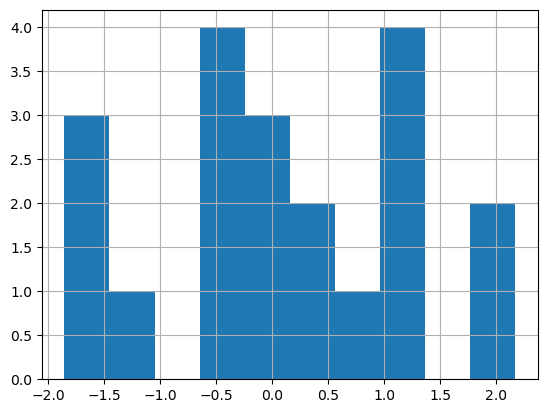

In [137]:
arr.hist() # bins=10 이 기본

**`pd.cut()` 함수**

시리즈에 포함된 전체 값의 범위를 4등분한 다음에 막대그래프를 그려보자.
이를 위해 먼저 시리즈의 항목을 네 개의 구간으로 분류한다.
`pd.cut()` 함수는 `bins`에 의해 지정된 정수 만큼의 구간으로
기존에 사용된 값들의 구간을 균등하게 등분한 다음에
구간으로 구성된 시리즈를 생성한다.

In [138]:
factor = pd.cut(arr, bins=4)
factor

0       (0.158, 1.165]
1     (-1.859, -0.848]
2       (0.158, 1.165]
3       (0.158, 1.165]
4       (0.158, 1.165]
5       (1.165, 2.171]
6      (-0.848, 0.158]
7      (-0.848, 0.158]
8      (-0.848, 0.158]
9      (-0.848, 0.158]
10      (1.165, 2.171]
11      (0.158, 1.165]
12    (-1.859, -0.848]
13     (-0.848, 0.158]
14      (0.158, 1.165]
15    (-1.859, -0.848]
16      (1.165, 2.171]
17     (-0.848, 0.158]
18    (-1.859, -0.848]
19     (-0.848, 0.158]
dtype: category
Categories (4, interval[float64, right]): [(-1.859, -0.848] < (-0.848, 0.158] < (0.158, 1.165] < (1.165, 2.171]]

`value_count()` 메서드를 이용하여 구간별 항목의 개수를 확인한다.

In [139]:
factor.value_counts()

(-0.848, 0.158]     7
(0.158, 1.165]      6
(-1.859, -0.848]    4
(1.165, 2.171]      3
Name: count, dtype: int64

아래 코드는 `sort_index()` 메서드를 이용하여 구간을 정렬한 다음에 막대그래프를 그린다.

In [142]:
factor.value_counts().sort_index()

(-1.859, -0.848]    4
(-0.848, 0.158]     7
(0.158, 1.165]      6
(1.165, 2.171]      3
Name: count, dtype: int64

<Axes: >

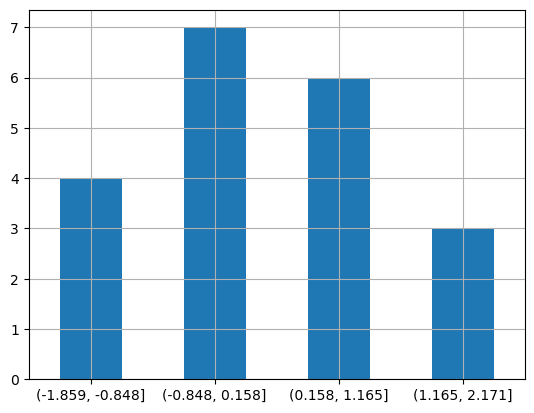

In [140]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

4등분한 구간에 라벨을 붙이면 구간 정보의 의미를 보다 정확히 전달한다.

In [144]:
factor = pd.cut(arr, bins=4, labels=['A', 'B', 'C', 'D'])
factor

0     C
1     A
2     C
3     C
4     C
5     D
6     B
7     B
8     B
9     B
10    D
11    C
12    A
13    B
14    C
15    A
16    D
17    B
18    A
19    B
dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<Axes: >

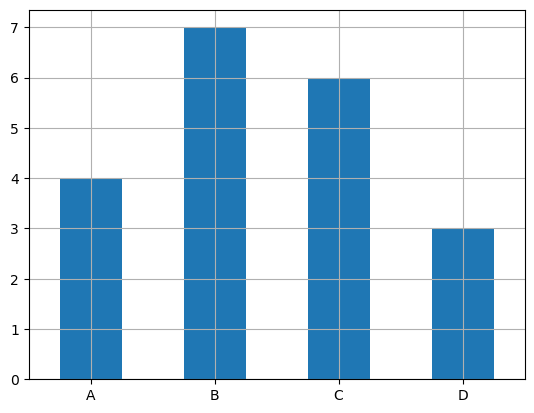

In [145]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

## 문자열 메서드 활용

시리즈와 `Index` 자료형은 `str` 속성을 이용하여 각각의 항목을 문자열로 변환하여 문자열 메서드를 적용해서
새로운 시리즈와 `Index` 자료형을 생성하는 기능을 제공한다.

**시리즈에 문자열 메서드 적용**

`str` 속성은 모든 항목을 문자열로 변환한 벡터를 가리킨다.

In [149]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str

변환된 벡터에 문자열 메서드를 적용하면 새로운 시리즈가 생성된다.

In [151]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

**`Index` 자료형에 문자열 메서드 적용**

아래 데이터프레임을 이용한다.

In [152]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[" Column A ", " Column B "], index=range(3))
df

,Column A,Column B
0,-1.212560,0.159991
1,-0.755223,0.349896
2,0.977542,-0.138585


열 라벨 인덱스에 대해 문자열 메서드를 적용해보자.

- 소문자화

In [153]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

- 양끝의 공백 제거

In [154]:
df.columns.str.lower().str.strip()

Index(['column a', 'column b'], dtype='object')

- 중간에 위치한 공백을 밑줄(underscore)로 대체

In [155]:
df.columns.str.strip().str.lower().str.replace(" ", "_")

Index(['column_a', 'column_b'], dtype='object')

열 라벨을 소문자로는 변경하지 않으면서 모든 공백을 제거해보자.

In [156]:
columns1 = df.columns.str.strip().str.replace(" ", "_")
columns1

Index(['Column_A', 'Column_B'], dtype='object')

In [157]:
df.columns=columns1
df

,Column_A,Column_B
0,-1.212560,0.159991
1,-0.755223,0.349896
2,0.977542,-0.138585
